# Visualizing geographical data with Basemap

In [1]:
# Initialize packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
%matplotlib inline


# Import the data

airlines.dat, airports.dat and routes.dat from https://github.com/fivethirtyeight/data

In [3]:
airlines = pd.read_csv('data/airline-geo/airlines.dat', 
                  names = ["id", "name", "alias", "iata","icao","callsign","country","active"])
airports = pd.read_csv('data/airline-geo/airports.dat', 
                  names = ["id", "name", "city", "country","code","icao","latitude","longitude","altitude", "offset", "dst", "timezone"])
routes = pd.read_csv('data/airline-geo/routes.dat', 
                  names = ["airline", "airline_id", "source", "source_id","dest","dest_id","codeshare","stops","equipment"])

# Converting from spherical coordinates to cartesian coordinates

In [5]:
# Convert from Series objects to List objects.
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()

# Convert latitude and longitude to x and y coordinates.
x, y = m(longitudes, latitudes)

# Display original longitude values
print(longitudes[0:5])
# Display original latitude values
print(latitudes[0:5])
# Display x-axis coordinates
print(x[0:5])
# Display y-axis coordinates
print(y[0:5])

[145.39188100000001, 145.78870000000001, 144.295861, 146.72624199999998, 147.22004999999999]
[-6.0816889999999999, -5.2070829999999999, -5.8267889999999998, -6.5698280000000002, -9.4433830000000007]
[36181909.301050939, 36226033.539869711, 36060037.494937442, 36330283.404696316, 36385192.323177092]
[14843790.192364652, 14941516.685597016, 14872287.53105044, 14789178.970192088, 14466473.840393927]


# Display airport data with a scatterplot

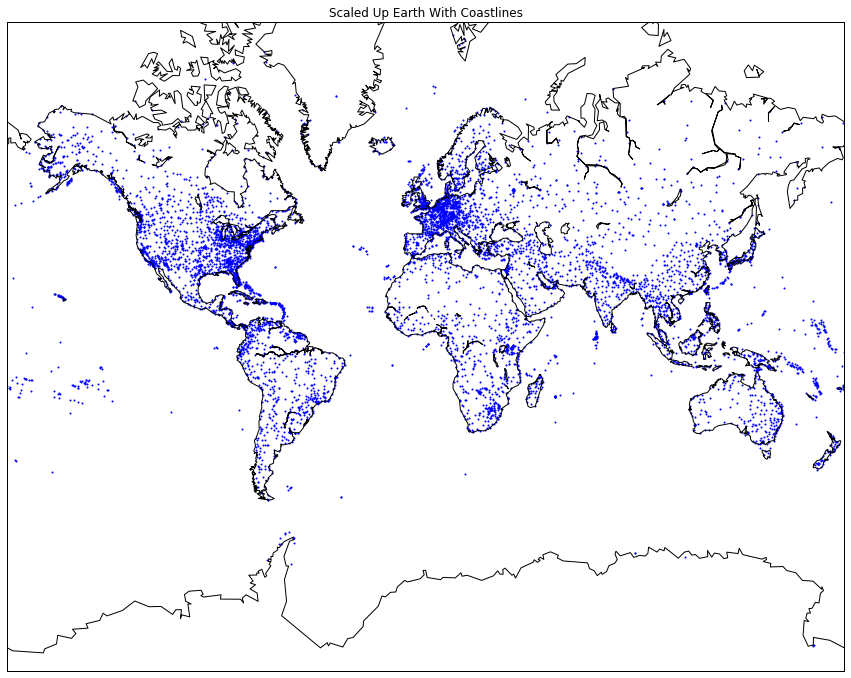

In [6]:
# Create a basemap constructor and initialize map
m = Basemap(projection="merc", llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
fig = plt.figure(figsize=(15,20))
ax = fig.add_subplot(1,1,1)
ax.set_title("Scaled Up Earth With Coastlines")

# Plot our data
m.scatter(x,y,s=1, color="blue")

# add coastlines
m.drawcoastlines()
plt.show()

# Map routes between Icelandic airports

First we have to map each airport's geolocation from airports dataframe to the routes dataframe

In [7]:
# Make a dictionary with geolocation of each airports code
airport_lon = {}
airport_lat = {}
for index, row in enumerate(airports["code"]):
    airport_lon[row] = airports["longitude"][index]
    airport_lat[row] = airports["latitude"][index]
    
# Make a new dataframe and add a column with geolocation for source
geo_routes = routes
geo_routes["start_lon"] = routes.source.map(airport_lon)
geo_routes["start_lat"] = routes.source.map(airport_lat)
geo_routes["end_lon"] = routes.dest.map(airport_lon)
geo_routes["end_lat"] = routes.dest.map(airport_lat)

Lets find all Icelandic flights

In [15]:
icelandic_airports_df = airports[airports["country"]=="Iceland"]
icelandic_airports_df

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
10,11,Akureyri,Akureyri,Iceland,AEY,BIAR,65.659994,-18.072703,6,0.0,N,Atlantic/Reykjavik
11,12,Egilsstadir,Egilsstadir,Iceland,EGS,BIEG,65.283333,-14.401389,76,0.0,N,Atlantic/Reykjavik
12,13,Hornafjordur,Hofn,Iceland,HFN,BIHN,64.295556,-15.227222,24,0.0,N,Atlantic/Reykjavik
13,14,Husavik,Husavik,Iceland,HZK,BIHU,65.952328,-17.425978,48,0.0,N,Atlantic/Reykjavik
14,15,Isafjordur,Isafjordur,Iceland,IFJ,BIIS,66.058056,-23.135278,8,0.0,N,Atlantic/Reykjavik
15,16,Keflavik International Airport,Keflavik,Iceland,KEF,BIKF,63.985000,-22.605556,171,0.0,N,Atlantic/Reykjavik
16,17,Patreksfjordur,Patreksfjordur,Iceland,PFJ,BIPA,65.555833,-23.965000,11,0.0,N,Atlantic/Reykjavik
17,18,Reykjavik,Reykjavik,Iceland,RKV,BIRK,64.130000,-21.940556,48,0.0,N,Atlantic/Reykjavik
18,19,Siglufjordur,Siglufjordur,Iceland,SIJ,BISI,66.133333,-18.916667,10,0.0,N,Atlantic/Reykjavik
19,20,Vestmannaeyjar,Vestmannaeyjar,Iceland,VEY,BIVM,63.424303,-20.278875,326,0.0,N,Atlantic/Reykjavik


Next we want to draw great circles between the source and destination

In [37]:
# A simple function which creates a great circle on a sphere
def create_great_circles(df):
    for index, row in df.iterrows():
        start_lon = row['start_lon']
        start_lat = row['start_lat']
        end_lon = row['end_lon']
        end_lat = row['end_lat']
        
        if abs(end_lat - start_lat) < 180 and abs(end_lon - start_lon) < 180:
            m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat, linewidth=1)

# Domestic flights in Iceland

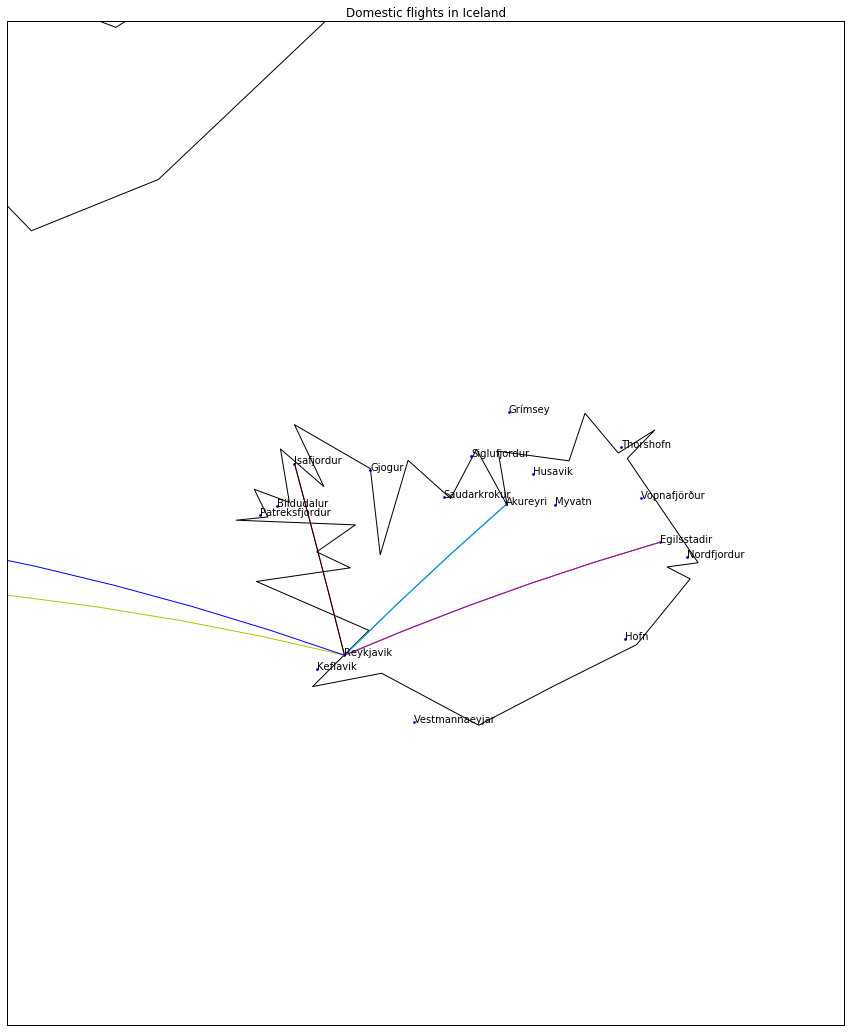

In [151]:
# Display ascii properly
import sys
reload(sys)  
sys.setdefaultencoding('utf8')

# Initialize the graph
m = Basemap(projection="merc", llcrnrlat=60, urcrnrlat=70, llcrnrlon=-30, urcrnrlon=-10)
fig = plt.figure(figsize=(15,20))
ax = fig.add_subplot(1,1,1)
ax.set_title("Domestic flights in Iceland")

# Ddd coastlines
m.drawcoastlines()
icelandic_airports = airports[airports["country"]=="Iceland"]["code"]
domestic_airports = icelandic_airports.drop([15])

# Icelandic airports
x, y = m(icelandic_airports_df["longitude"].tolist(), icelandic_airports_df["latitude"].tolist())
m.scatter(x,y,s=3, color="blue")
coord = np.vstack((x,y)).T

# Plot city names on proper locations
icelandic_airports_df = icelandic_airports_df.dropna()
index = 0
for row in icelandic_airports_df["city"]:
    name = str(row)
    lon = icelandic_airports_df["longitude"].iloc[index]
    lat = icelandic_airports_df["latitude"].iloc[index]
    new_coords = m(lon,lat)
    lon = str(new_coords[0])
    lat = str(new_coords[1])
    ax.annotate(str(row),xy=(lon, lat))
    index += 1


# Draw great circles
for airport in domestic_airports:
    dfw = geo_routes[geo_routes["source"]==airport]
    create_great_circles(dfw)
    
            
plt.show()

Most of the airports are for emergency flights only. Few of them are commercial.

# Iceland, international flights

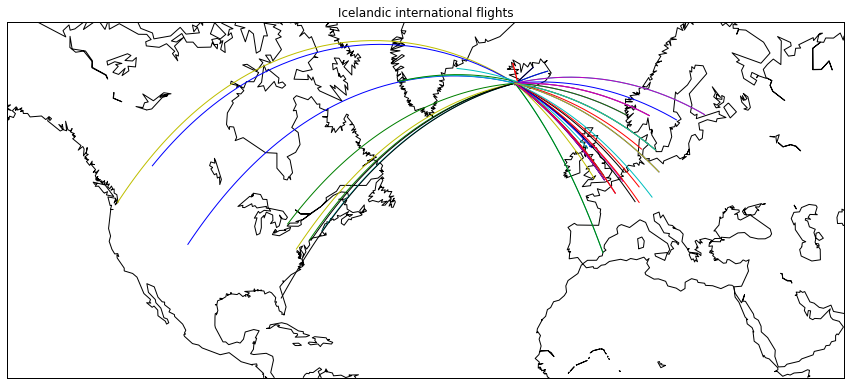

In [152]:
# Init
m = Basemap(projection="merc", llcrnrlat=10, urcrnrlat=70, llcrnrlon=-150, urcrnrlon=60)
fig = plt.figure(figsize=(15,20))
ax = fig.add_subplot(1,1,1)
ax.set_title("Icelandic international flights")

# Add coastlines
m.drawcoastlines()

# Draw great circles
for airport in icelandic_airports:
    dfw = geo_routes[geo_routes["source"]==airport]
    create_great_circles(dfw)
    
plt.show()

European/North American destinations only